In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import yfinance as yf

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import RandomForestRegressor

In [ ]:
start ='2012-01-01'
end='2022-12-21'
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [ ]:
#we are just changinf the indices to normal numerals rather than showcasing date
data.reset_index(inplace=True)

In [ ]:
#lets see the movin average over 100 days
ma_100_days=data.Close.rolling(100).mean()

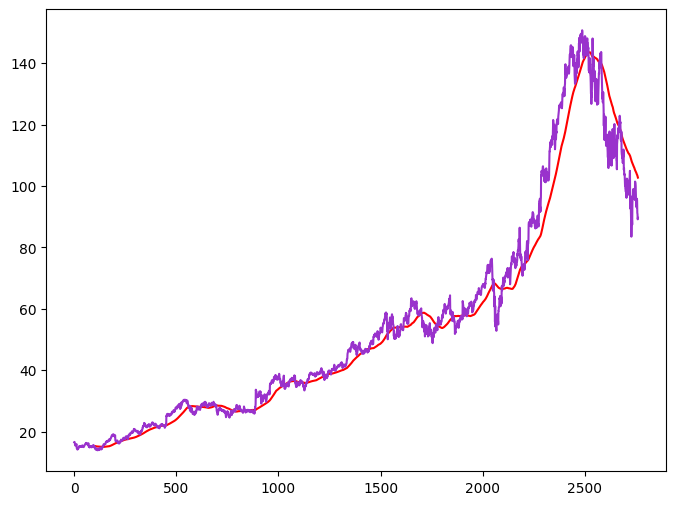

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'darkorchid')
plt.show()

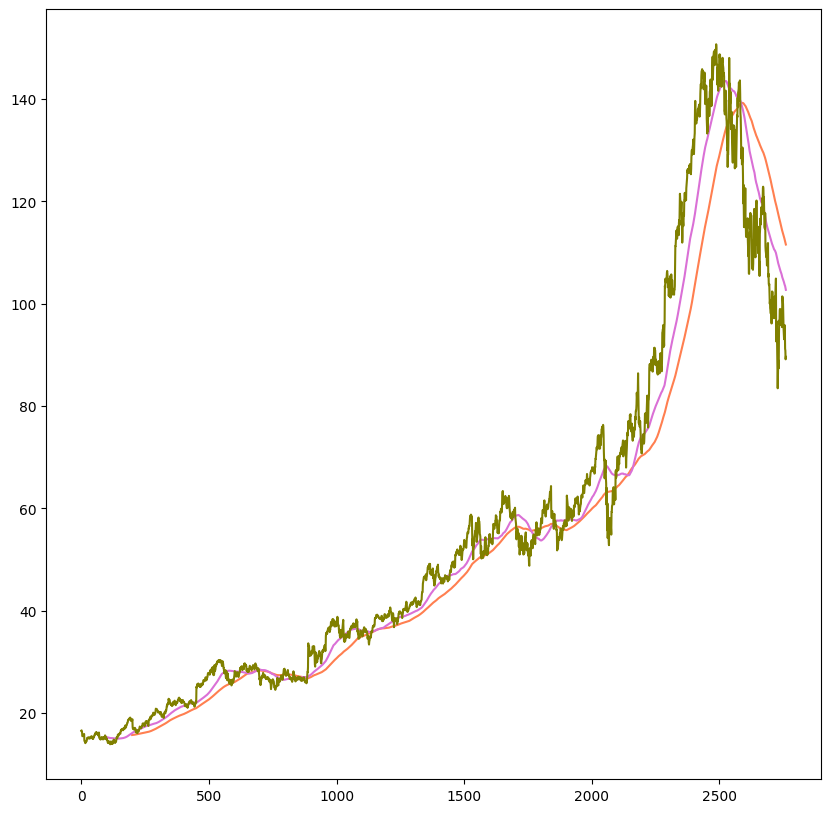

In [ ]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(10,10))
plt.plot(ma_200_days,'coral')
plt.plot(ma_100_days,'orchid')
plt.plot(data.Close,'olive')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [ ]:
data_train.shape,data_test.shape

((2208, 1), (553, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale=scaler.fit_transform(data_train)

In [ ]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [ ]:
x,y=np.array(x,),np.array(y)
print(x.shape)
print(y.shape)

(2108, 100, 1)
(2108,)


In [ ]:
#model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

LSTM Layers

In [ ]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

TCN Layer

In [ ]:
'''
x = x.reshape((x.shape[0], x.shape[1], 1))
print("Input shape after reshaping:", x.shape)
model = Sequential()
'''

'\nx = x.reshape((x.shape[0], x.shape[1], 1))\nprint("Input shape after reshaping:", x.shape)\nmodel = Sequential()\n'

In [ ]:
'''
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[1], x.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
'''

"\nmodel.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[1], x.shape[2])))\nmodel.add(MaxPooling1D(pool_size=2))\nmodel.add(Conv1D(filters=64, kernel_size=3, activation='relu'))\nmodel.add(MaxPooling1D(pool_size=2))\n"

In [ ]:
#outputlayer
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 [==============================] - 22s 255ms/step - loss: 0.0265
Epoch 2/50
66/66 [==============================] - 18s 272ms/step - loss: 0.0066
Epoch 3/50
66/66 [==============================] - 17s 253ms/step - loss: 0.0063
Epoch 4/50
66/66 [==============================] - 19s 287ms/step - loss: 0.0048
Epoch 5/50
66/66 [==============================] - 18s 264ms/step - loss: 0.0052
Epoch 6/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0049
Epoch 7/50
66/66 [==============================] - 18s 269ms/step - loss: 0.0045
Epoch 8/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0037
Epoch 9/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0039
Epoch 10/50
66/66 [==============================] - 18s 272ms/step - loss: 0.0036
Epoch 11/50
66/66 [==============================] - 17s 255ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 17s 253ms/step - loss: 0.0034
Epoch 13/50
6

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_40 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_44 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_41 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_45 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_42 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_46 (LSTM)              (None, 120)             

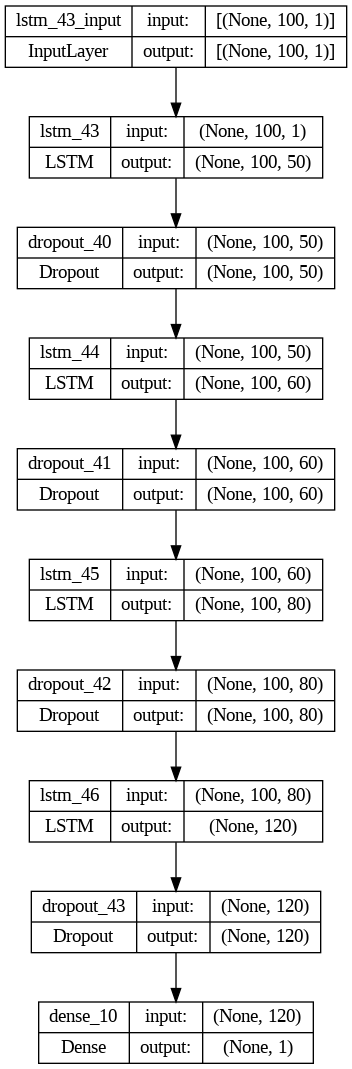

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_lstm_tcn.png', show_shapes=True, show_layer_names=True)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x.reshape(x.shape[0], x.shape[1]), y)


RandomForestRegressor(random_state=42)

In [ ]:
past_100_days=data_test.tail(100)
data_test=pd.concat([past_100_days,data_test],ignore_index=True)

In [ ]:
data_test_scale=scaler.fit_transform(data_test)

In [ ]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

In [ ]:
x,y=np.array(x),np.array(y)

In [ ]:
rf_predict = rf_model.predict(x.reshape(x.shape[0], x.shape[1]))
print(rf_predict.shape)

(1053,)


In [ ]:
y_predict=model.predict(x)
print(y_predict.shape)

33/33 [==============================] - 3s 84ms/step
(1053, 1)


In [ ]:
scaler.scale_
p=scaler.scale_
1/p

array([82.71399689])

In [ ]:
y_predict=y_predict*(1/p)
print(y_predict.shape)

(1053, 1)


In [ ]:
y=y*(1/p)

In [ ]:
y_predict = y_predict.reshape(-1)  # Reshape y_predict to be 1-dimensional
ensemble_predict = (y_predict + rf_predict) / 2

print(ensemble_predict.shape)  # This should print (853,)

(1053,)


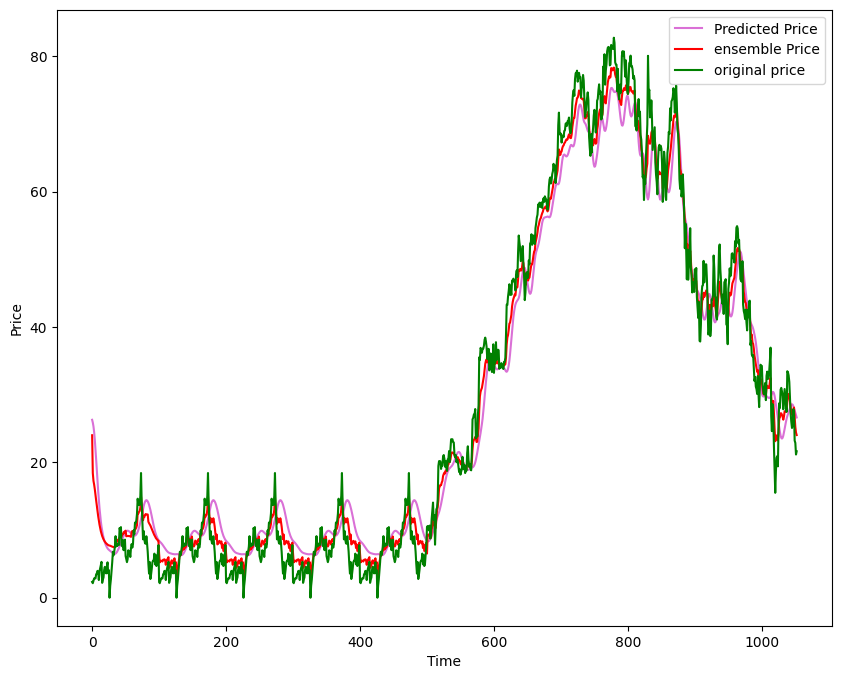

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'orchid',label='Predicted Price')
plt.plot(ensemble_predict,'r',label='ensemble Price')
plt.plot(y,'g',label='original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'predictions' are your model's output and 'y_test' are the actual values
rmse = mean_squared_error(y, y_predict, squared=False)  # Set squared=False for RMSE
mae = mean_absolute_error(y, y_predict)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 5.147191937073747
Mean Absolute Error: 4.103964463364983


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'predictions' are your model's output and 'y_test' are the actual values
rmse = mean_squared_error(y, ensemble_predict, squared=False)  # Set squared=False for RMSE
mae = mean_absolute_error(y, ensemble_predict)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 2.970903593006301
Mean Absolute Error: 2.2803172995491847


In [ ]:
model.save('Stock Predictions Model')